## Fast Fourier Transform

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("data/extracted_eeg15.csv")
df.head()

,t,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4,state,epoch
0,0,40.821597,-55.720836,132.406203,-65.906920,-27.235861,7.739363,-0.103020,-42.830483,-16.779351,18.105731,-10.108818,15.131034,23.874840,-19.393478,focused,0
1,1,164.275699,-225.401365,533.689425,-265.215716,-109.811868,31.589598,-0.305979,-172.698659,-66.833721,73.032387,-41.106019,61.126783,95.936295,-78.276861,focused,0
2,2,252.201083,-350.066454,824.645749,-408.544243,-170.189040,49.851558,-0.561157,-266.739265,-99.321655,112.366766,-65.002391,94.192815,147.314882,-120.148647,focused,0
3,3,201.299424,-285.483140,670.948433,-330.759800,-140.280957,41.485909,-1.769399,-215.703902,-71.806241,89.031566,-55.911816,74.458805,117.688938,-93.197820,focused,0
4,4,151.189059,-213.813066,511.170971,-252.139256,-109.470773,30.539078,-3.822168,-161.832387,-47.651066,63.987032,-44.520633,52.789621,86.498565,-62.924980,focused,0


In [60]:
df.describe()

,t,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4,epoch
count,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000
mean,117185.500000,-0.000796,0.001664,-0.000426,-0.000771,-0.000737,0.001404,0.003138,0.001228,-0.000156,-0.000624,-0.000891,-0.000987,-0.002299,0.000252,915.015633
std,67657.512983,6.820961,6.506749,9.732587,7.071858,6.622523,9.622508,9.480014,10.398798,8.031284,6.130513,8.721106,6.062143,6.259187,7.355975,528.574256
min,0.000000,-250.272950,-350.066454,-266.167796,-408.544243,-249.169179,-76.796953,-74.159925,-266.739265,-99.321655,-251.027099,-1631.444418,-251.027098,-251.665952,-120.148647,0.000000
25%,58592.750000,-3.771793,-3.678801,-4.559432,-3.836912,-3.864927,-5.181541,-5.367281,-5.475723,-4.792199,-3.524329,-3.659640,-3.490930,-3.577444,-4.487228,457.000000
50%,117185.500000,0.025518,0.006329,-0.027069,0.035489,0.084119,0.024576,0.067148,0.036545,-0.020094,0.015097,0.008275,0.007605,0.009008,-0.025582,915.000000
75%,175778.250000,3.768930,3.681789,4.533321,3.862095,3.938184,5.231562,5.421540,5.518093,4.780645,3.534404,3.642907,3.492689,3.585261,4.460426,1373.000000
max,234371.000000,329.263468,257.312939,824.645749,136.332423,142.437287,244.267416,226.956244,251.371775,284.108234,136.425810,611.291082,94.192815,147.314882,261.584540,1831.000000


In [61]:
# setting
fs = 128

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Function to Visualize
def viz_fft(eeg_data, channel, state, epoch=0, fs=128):
    data = eeg_data.copy()
    data = data[data['state'] == state]
    data['epoch'] = np.arange(len(data)) // fs

    data = eeg_data[eeg_data['epoch'] == epoch][channel]
    # Apply FFT
    fft_data = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data), d=1/fs)

    # Take only positive frequencies
    positive_freqs = freqs[freqs >= 0]
    positive_fft_data = np.abs(fft_data[freqs >= 0])

    # Plot
    plt.plot(positive_freqs, positive_fft_data)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    # plt.show()

def viz_nepochs_state(channel, num_epochs, state):
    plt.figure(figsize=(12,10))
    for i in range(1, num_epochs+1):
        plt.subplot(num_epochs, 1, i)
        viz_fft(df, channel, state, i)
    plt.tight_layout()
    plt.show()

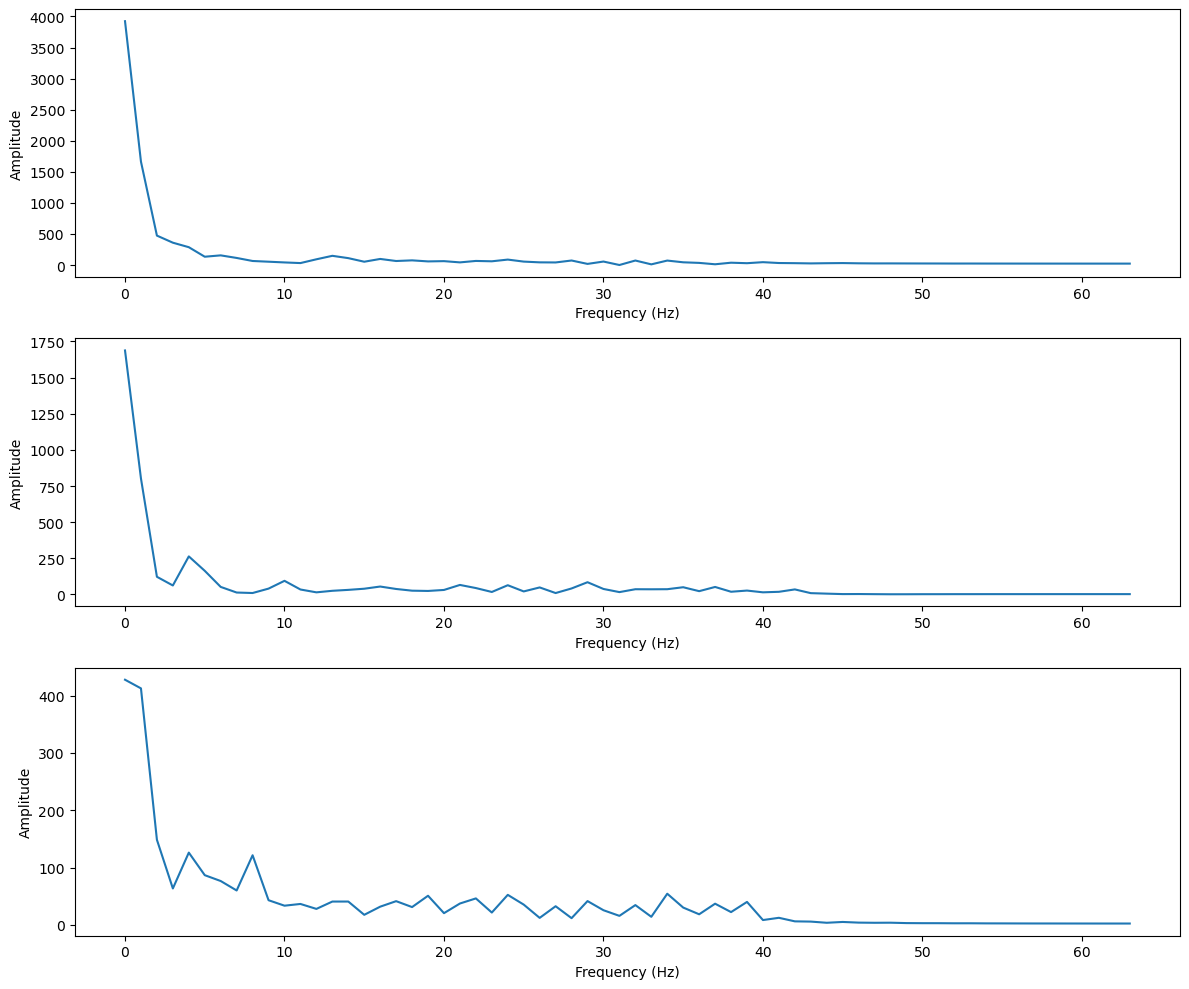

In [63]:
# Test with channel ED_F7 with 3 epochs, focused state
channel = 'ED_F7'
num_epochs = 3

viz_nepochs_state(channel, num_epochs, state='focused')

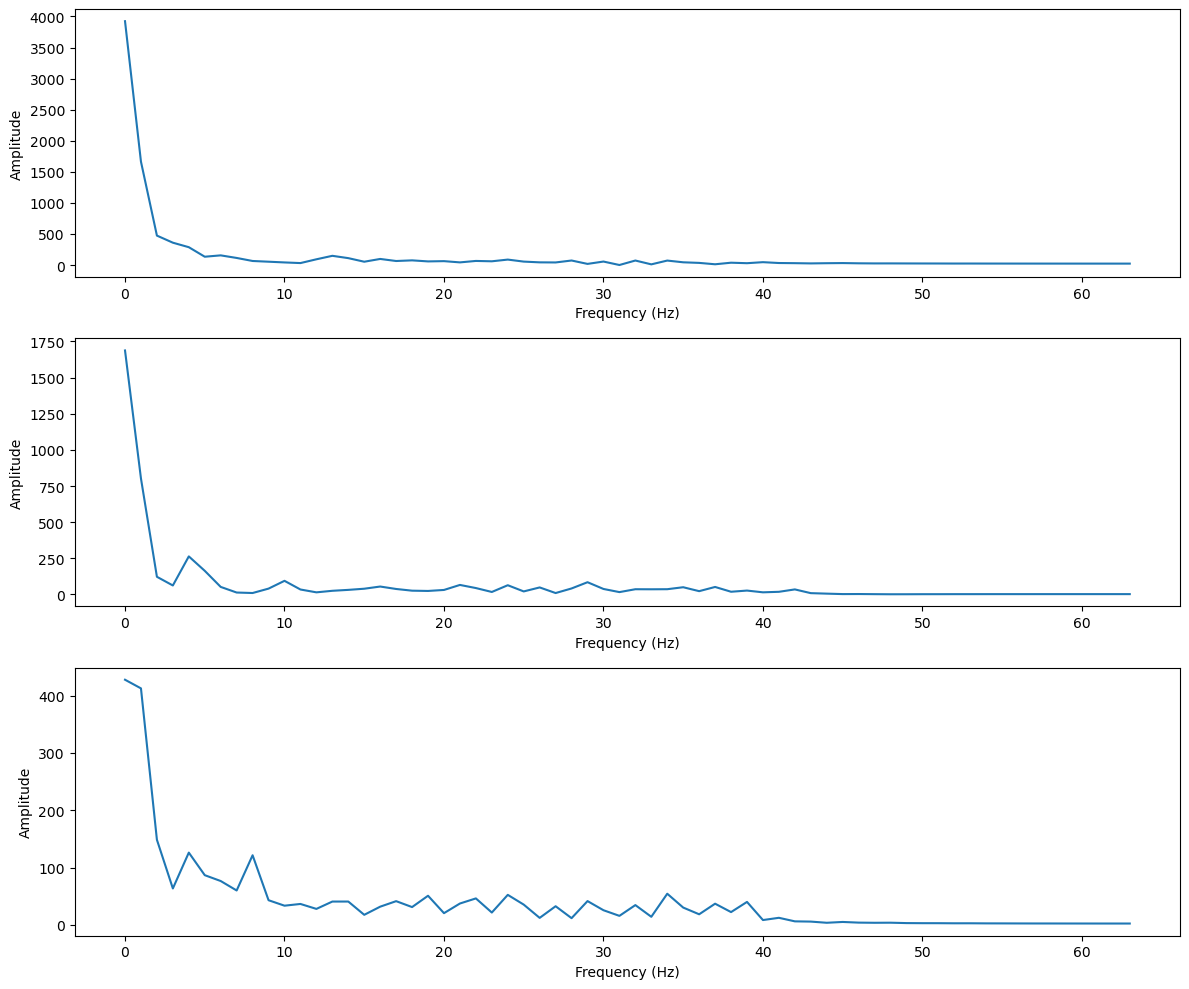

In [64]:
# Test with channel ED_F7 with 3 epochs, unfocused state
viz_nepochs_state(channel, num_epochs, state='unfocused')

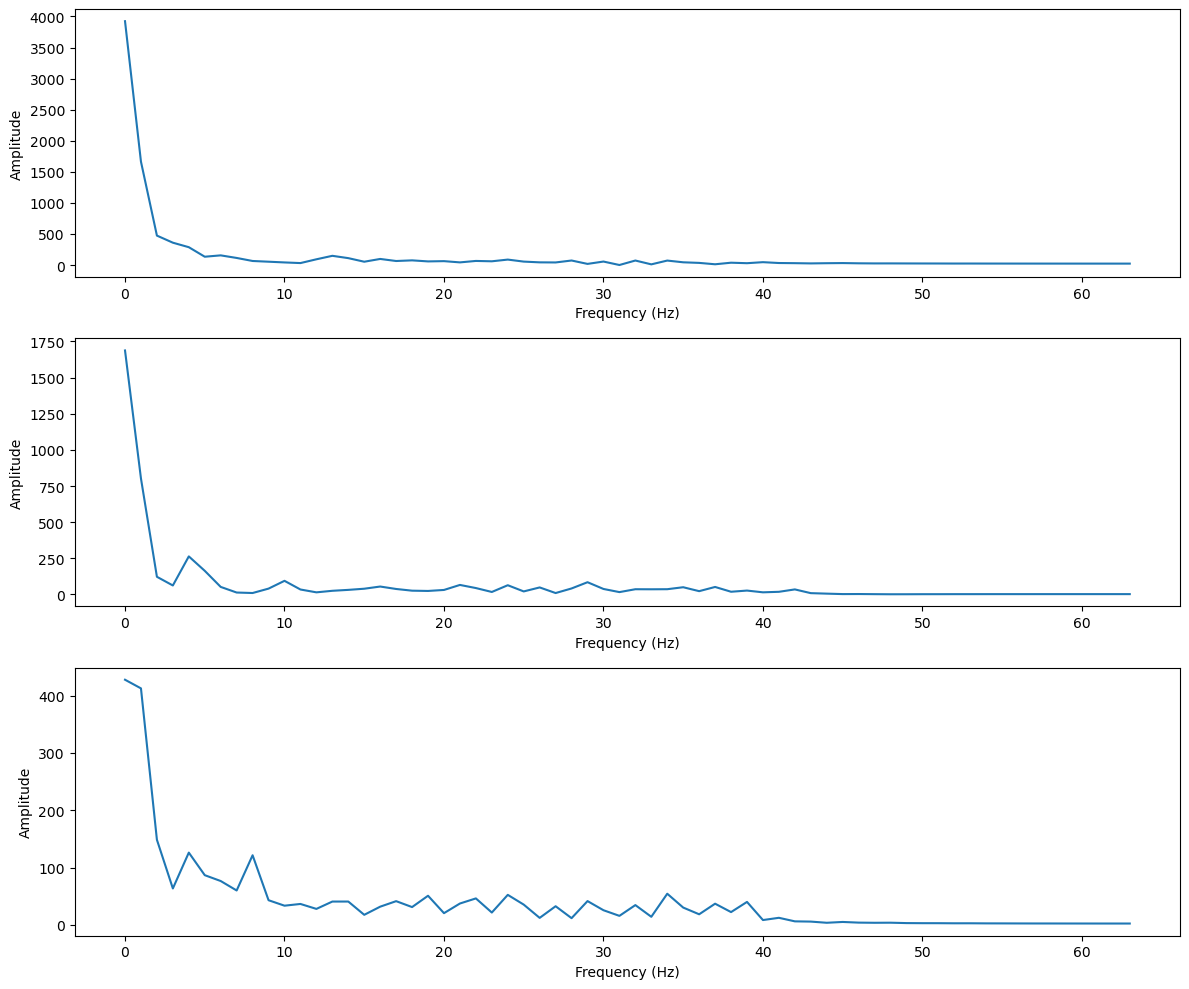

In [65]:
# Test with channel ED_F7 with 3 epochs, drownsy state

viz_nepochs_state(channel, num_epochs, state='drownsy')

In [66]:
# useful channel
useful_channels = ['ED_F7','ED_F3','ED_P7','ED_O1','ED_O2','ED_P8','ED_AF4']
# then useful_columns is 
useful_columns = ['t', 'ED_F7','ED_F3','ED_P7','ED_O1','ED_O2','ED_P8','ED_AF4', 'state']

df = df[useful_columns]
df.head()

,t,ED_F7,ED_F3,ED_P7,ED_O1,ED_O2,ED_P8,ED_AF4,state
0,0,-55.720836,132.406203,7.739363,-0.103020,-42.830483,-16.779351,-19.393478,focused
1,1,-225.401365,533.689425,31.589598,-0.305979,-172.698659,-66.833721,-78.276861,focused
2,2,-350.066454,824.645749,49.851558,-0.561157,-266.739265,-99.321655,-120.148647,focused
3,3,-285.483140,670.948433,41.485909,-1.769399,-215.703902,-71.806241,-93.197820,focused
4,4,-213.813066,511.170971,30.539078,-3.822168,-161.832387,-47.651066,-62.924980,focused


Thử trích xuất đặc trưng để dễ hình dung:
- **Power spectral density (PSD):** Tổng công suất trong từng dải sóng (delta, theta, alpha, beta, gamma)
- **Relative power:** tỷ lệ công suất của từng dải sóng đối với tổng công suất
- **Peak Frequency:** tần số tại điểm có biên độ lớn nhất
- **Band ratios:** Tỷ lệ giữa các dải sóng (ví dụ beta/alpha)

Sẽ tìm hiểu các features khác và thêm vào sau

### Epoch method

Giải thích từng bước:

Chuẩn bị dữ liệu và tham số:

Chuyển dữ liệu EEG và nhãn sang mảng NumPy để tăng tốc độ xử lý.
Xác định tần số và tần số dương cho FFT.
Tiền tính mặt nạ dải tần số:

Tính toán mặt nạ cho mỗi dải tần chỉ một lần trước khi vào vòng lặp chính.
Vòng lặp qua từng epoch:

Chia dữ liệu thành các epoch có độ dài cố định.
Kiểm tra và bỏ qua các epoch không đủ độ dài.
Tính toán FFT và lấy dữ liệu tần số dương:

Áp dụng FFT cho dữ liệu của epoch.
Lấy biên độ của các tần số dương.
Tính toán công suất và công suất tương đối:

Tính tổng công suất cho mỗi dải tần và tổng công suất toàn bộ.
Tính toán công suất tương đối cho mỗi dải tần.
Tính tần số đỉnh và thống kê mô tả:

Xác định tần số có biên độ lớn nhất cho mỗi kênh.
Tính các thống kê mô tả (mean, std, median, min, max) cho mỗi kênh.
Tổng hợp đặc trưng:

Kết hợp tất cả các đặc trưng của các kênh thành một vector đặc trưng cho epoch.
Thêm vector đặc trưng và nhãn vào danh sách.
Chuyển đổi kết quả:

Chuyển danh sách đặc trưng và nhãn thành mảng NumPy để sử dụng cho mô hình máy học.


In [67]:
import numpy as np

def feature_extraction_optimized(df, fs, epoch_length):
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 50)  # Max is 50 Hz due to preprocessing
    }

    len_data = len(df)
    feature_matrix = []
    labels = []
    num_channels = df.shape[1] - 2  # Exclude time and state columns

    # Convert data to numpy array for performance improvement
    eeg_data = df.iloc[:, 1:num_channels+1].values  # EEG data
    states = df.iloc[:, -1].values  # State labels

    # Precompute frequencies for FFT
    freqs = np.fft.fftfreq(epoch_length, d=1/fs)
    positive_freqs = freqs[freqs >= 0]

    # Precompute masks for frequency bands
    freqs_in_band = {}
    for band_name, (low, high) in bands.items():
        freqs_in_band[band_name] = (positive_freqs >= low) & (positive_freqs < high)

    for i in range(0, len_data - epoch_length + 1, epoch_length):
        epoch_data = eeg_data[i:i+epoch_length, :]
        label = states[i]  # Get label at the start of the epoch

        # Check if epoch is not of sufficient length
        if epoch_data.shape[0] != epoch_length:
            continue

        # Apply FFT to epoch
        fft_data = np.fft.fft(epoch_data, axis=0)
        positive_fft_data = np.abs(fft_data[freqs >= 0, :])

        # Calculate total power for each frequency band
        band_powers = {}
        for band_name in bands.keys():
            band_mask = freqs_in_band[band_name]
            band_power = np.sum(positive_fft_data[band_mask, :], axis=0)  # Result is an array of size (num_channels,)
            band_powers[band_name] = band_power

        # Calculate total power across all frequency bands
        total_power = np.sum(list(band_powers.values()), axis=0)  # Array (num_channels,)

        # Calculate relative power for each frequency band
        relative_powers = {}
        for band_name in bands.keys():
            relative_powers[band_name] = band_powers[band_name] / total_power

        # Find peak frequency for each channel
        freq_indices = np.argmax(positive_fft_data, axis=0)
        peak_freqs = positive_freqs[freq_indices]

        # Calculate descriptive statistics for each channel
        mean_vals = np.mean(positive_fft_data, axis=0)
        std_vals = np.std(positive_fft_data, axis=0)
        median_vals = np.median(positive_fft_data, axis=0)
        min_vals = np.min(positive_fft_data, axis=0)
        max_vals = np.max(positive_fft_data, axis=0)

        # Combine features for the epoch
        epoch_features = []
        for ch in range(num_channels):
            channel_features = [
                band_powers['delta'][ch], band_powers['theta'][ch], band_powers['alpha'][ch],
                band_powers['beta'][ch], band_powers['gamma'][ch],
                relative_powers['delta'][ch], relative_powers['theta'][ch], relative_powers['alpha'][ch],
                relative_powers['beta'][ch], relative_powers['gamma'][ch],
                peak_freqs[ch], mean_vals[ch], std_vals[ch], median_vals[ch], min_vals[ch], max_vals[ch]
            ]
            epoch_features.extend(channel_features)

        feature_matrix.append(epoch_features)
        labels.append(label)

    # Convert to numpy array
    X = np.array(feature_matrix)
    y = np.array(labels)

    return X, y

In [68]:
fs = 128
epoch_length = fs * 1  # Epoch length: 1s

X, y = feature_extraction_optimized(df, fs, epoch_length)

X.shape, y.shape

((1831, 112), (1831,))

In [69]:
unique, counts = np.unique(y, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{'drownsy': 630, 'focused': 601, 'unfocused': 600}


## Apply thử mô hình cơ bản

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
label_encoder = LabelEncoder()

X_scaled = scaler.fit_transform(X)
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, shuffle=True)

In [71]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

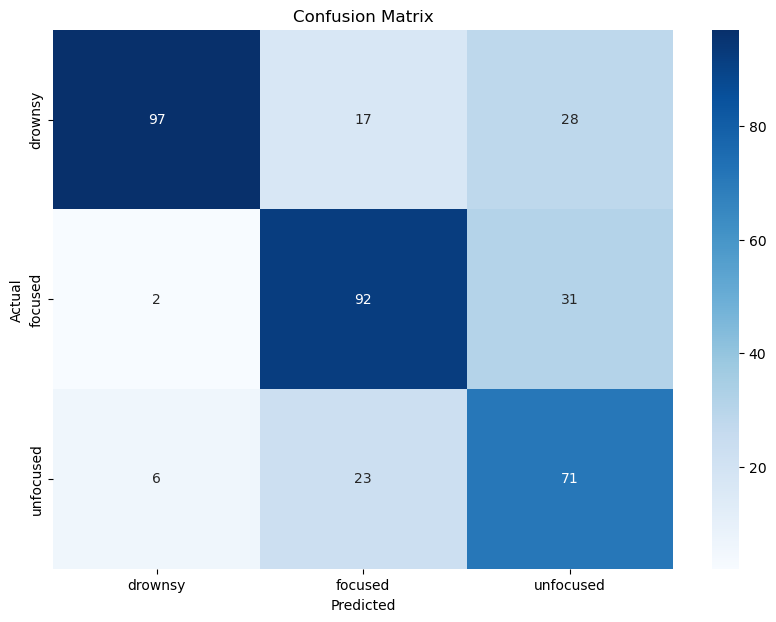

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()